In [100]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [101]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [102]:
filenames=os.listdir('dogs-vs-cats/train')
categories=[]
for filename in filenames:
    category=filename.split(".")[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)

In [103]:
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [104]:
df

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0
...,...,...
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1


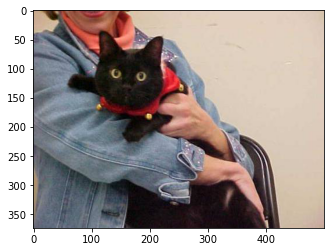

In [105]:
sample=random.choice(filenames)
image=load_img('dogs-vs-cats/train/'+sample)
plt.imshow(image)

In [106]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_9 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)      

In [107]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [109]:
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [110]:
callbacks = [earlystop, learning_rate_reduction]

In [111]:
df['category']=df['category'].replace({0:'cat',1:'dog'})
df['category']

0        cat
1        cat
2        cat
3        cat
4        cat
        ... 
24995    dog
24996    dog
24997    dog
24998    dog
24999    dog
Name: category, Length: 25000, dtype: object

In [112]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [113]:
train_df, validate_df=train_test_split(df, test_size=0.2, random_state=42)

In [114]:
validate_df

,filename,category
6868,cat.493.jpg,cat
24016,dog.9112.jpg,dog
9668,cat.745.jpg,cat
13640,dog.11022.jpg,dog
14018,dog.11363.jpg,dog
...,...,...
8670,cat.6551.jpg,cat
11839,cat.9403.jpg,cat
4013,cat.236.jpg,cat
21147,dog.6530.jpg,dog


In [115]:
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

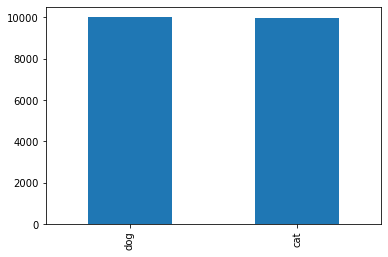

In [116]:
train_df['category'].value_counts().plot.bar()

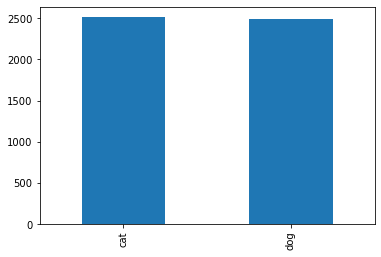

In [117]:
validate_df['category'].value_counts().plot.bar()

In [118]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [119]:
print(total_train)
print(total_validate)

20000
5000


In [120]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [128]:
train_generator=train_datagen.flow_from_dataframe(
    train_df,
    "dogs-vs-cats/train/",
    x_col="filename",
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [122]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "dogs-vs-cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [123]:
example_df=train_df.sample(1).reset_index(drop=True)

In [125]:
example_generator=train_datagen.flow_from_dataframe(
    example_df,
    'dogs-vs-cats/train/',
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


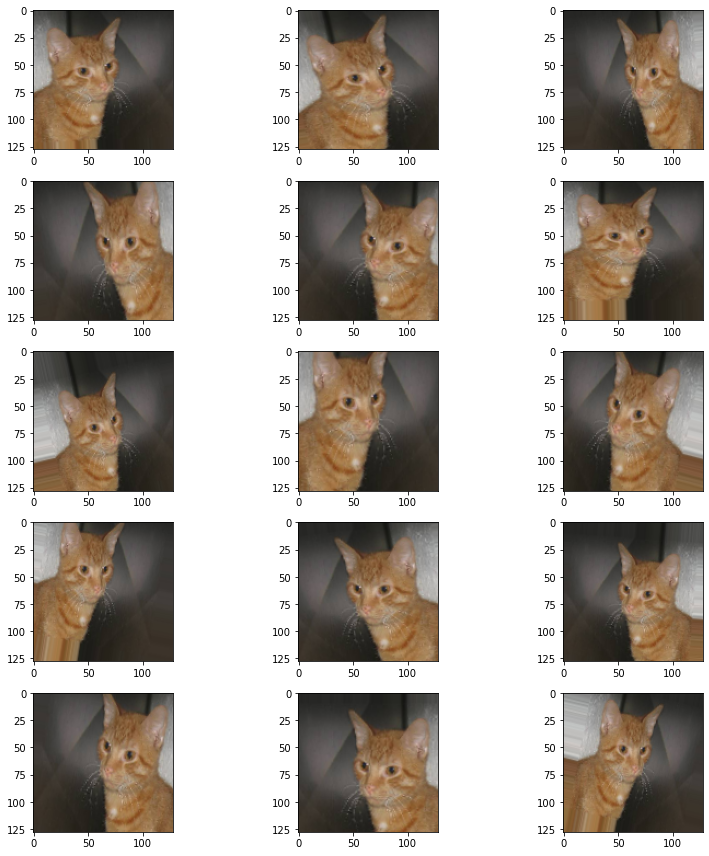

In [126]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [133]:
history = model.fit_generator(
    train_generator, 
    epochs=3,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/3
1333/1333 [==============================] - 853s 640ms/step - loss: 0.7540 - accuracy: 0.6258 - val_loss: 0.8780 - val_accuracy: 0.6014
Epoch 2/3
1333/1333 [==============================] - 788s 591ms/step - loss: 0.5623 - accuracy: 0.7124 - val_loss: 0.6197 - val_accuracy: 0.6985
Epoch 3/3
1333/1333 [==============================] - 764s 573ms/step - loss: 0.5067 - accuracy: 0.7588 - val_loss: 0.4249 - val_accuracy: 0.7976


In [134]:
test_filenames = os.listdir("dogs-vs-cats/test1/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [135]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "dogs-vs-cats/test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [136]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

test_df['category'] = np.argmax(predict, axis=-1)

Instructions for updating:
Please use Model.predict, which supports generators.


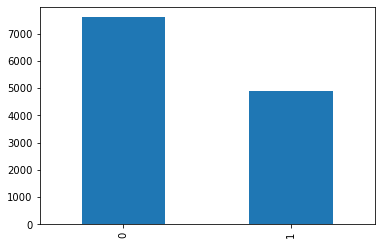

In [137]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

test_df['category'].value_counts().plot.bar()

In [129]:
from keras.models import load_model

In [132]:
model=load_model("model.h5")

ValueError: No model found in config file.

In [9]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

57344/57026 [==============================] - 0s 3us/step
(404, 13) (102, 13) (404,) (102,)


In [13]:
from keras.models import Sequential
model = Sequential()

In [14]:
from keras.layers import Activation, Dense
model.add(Dense(10, input_shape = (13,)))  
model.add(Activation('sigmoid'))
model.add(Dense(10))                        
model.add(Activation('sigmoid'))
model.add(Dense(10))                        
model.add(Activation('sigmoid'))
model.add(Dense(1))     

In [12]:
model.add(Dense(10, input_shape = (13,), activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(1))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                140       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [16]:
from keras import optimizers
sgd = optimizers.SGD(lr = 0.01)   
model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mse'])

In [17]:
model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
9/9 [==============================] - 0s 1ms/step - loss: 373.6865 - mse: 373.6865
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 99.3156 - mse: 99.3156
Epoch 3/100
9/9 [==============================] - 0s 889us/step - loss: 83.5944 - mse: 83.5944
Epoch 4/100
9/9 [==============================] - 0s 889us/step - loss: 83.4984 - mse: 83.4984
Epoch 5/100
9/9 [==============================] - 0s 777us/step - loss: 83.9424 - mse: 83.9424
Epoch 6/100
9/9 [==============================] - 0s 778us/step - loss: 83.5289 - mse: 83.5289
Epoch 7/100
9/9 [==============================] - 0s 889us/step - loss: 82.2827 - mse: 82.2827
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 82.5472 - mse: 82.5472
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 82.3844 - mse: 82.3844
Epoch 10/100
9/9 [==============================] - 0s 778us/step - loss: 84.2770 - mse: 84.2770
Epoch 11/100
9/9 [===========================

9/9 [==============================] - 0s 1ms/step - loss: 77.3975 - mse: 77.3975
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 77.6736 - mse: 77.6736
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 77.8631 - mse: 77.8631
Epoch 89/100
9/9 [==============================] - 0s 667us/step - loss: 77.4490 - mse: 77.4490
Epoch 90/100
9/9 [==============================] - 0s 667us/step - loss: 77.4009 - mse: 77.4009
Epoch 91/100
9/9 [==============================] - 0s 2ms/step - loss: 77.4360 - mse: 77.4360
Epoch 92/100
9/9 [==============================] - 0s 666us/step - loss: 77.1087 - mse: 77.1087
Epoch 93/100
9/9 [==============================] - 0s 889us/step - loss: 77.7125 - mse: 77.7125
Epoch 94/100
9/9 [==============================] - 0s 889us/step - loss: 80.0313 - mse: 80.0313
Epoch 95/100
9/9 [==============================] - 0s 778us/step - loss: 77.7665 - mse: 77.7665
Epoch 96/100
9/9 [===========================

In [18]:
results = model.evaluate(X_test, y_test)

print(model.metrics_names)     
print(results)                

print('loss: ', results[0])
print('mse: ', results[1])

4/4 [==============================] - 0s 1ms/step - loss: 82.1014 - mse: 82.1014
['loss', 'mse']
[82.10138702392578, 82.10138702392578]
loss:  82.10138702392578
mse:  82.10138702392578


In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

whole_data = load_breast_cancer()

In [20]:
X_data = whole_data.data
y_data = whole_data.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 7) 

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)


In [22]:
from keras.models import Sequential
model = Sequential()  

In [23]:
from keras.layers import Activation, Dense
model.add(Dense(10, input_shape = (30,)))   
model.add(Activation('sigmoid'))
model.add(Dense(10))                        
model.add(Dense(10))                      
model.add(Activation('sigmoid'))
model.add(Dense(1))                          
model.add(Activation('sigmoid')) 

In [24]:
from keras import optimizers
sgd = optimizers.SGD(lr = 0.01)    # stochastic gradient descent optimizer
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['acc'])   

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                310       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
_________________________________________________________________
activation_8 (Activation)    (None, 1)                

In [26]:
model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6730 - acc: 0.6055
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6725 - acc: 0.6055
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6722 - acc: 0.6055
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6720 - acc: 0.6055
Epoch 5/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6717 - acc: 0.6055
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6716 - acc: 0.6055
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6715 - acc: 0.6055
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6714 - acc: 0.6055
Epoch 9/100
8/8 [==============================] - 0s 1000us/step - loss: 0.6713 - acc: 0.6055
Epoch 10/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6713 - acc: 0.6055
Epoch 11/100
8/8 [==============================] - 0s 1ms/step - loss: 0.67

8/8 [==============================] - 0s 875us/step - loss: 0.6709 - acc: 0.6055
Epoch 89/100
8/8 [==============================] - 0s 874us/step - loss: 0.6710 - acc: 0.6055
Epoch 90/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6710 - acc: 0.6055
Epoch 91/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6709 - acc: 0.6055
Epoch 92/100
8/8 [==============================] - 0s 750us/step - loss: 0.6710 - acc: 0.6055
Epoch 93/100
8/8 [==============================] - 0s 872us/step - loss: 0.6709 - acc: 0.6055
Epoch 94/100
8/8 [==============================] - 0s 875us/step - loss: 0.6709 - acc: 0.6055
Epoch 95/100
8/8 [==============================] - 0s 750us/step - loss: 0.6709 - acc: 0.6055
Epoch 96/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6709 - acc: 0.6055
Epoch 97/100
8/8 [==============================] - 0s 875us/step - loss: 0.6710 - acc: 0.6055
Epoch 98/100
8/8 [==============================] - 0s 750us/step - l

In [27]:
results = model.evaluate(X_test, y_test)

print(model.metrics_names)
print(results)               

6/6 [==============================] - 0s 2ms/step - loss: 0.6396 - acc: 0.6784
['loss', 'acc']
[0.6395758986473083, 0.6783625483512878]


In [28]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

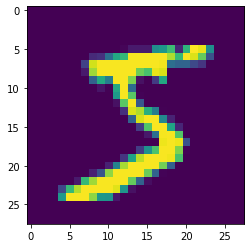

Label:  5


In [29]:
plt.imshow(X_train[0])  
plt.show()
print('Label: ', y_train[0])

In [30]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [32]:
print(X_train.shape)
X_train=X_train.reshape((X_train.shape[0], -1))
print(X_train.shape)

(60000, 28, 28)
(60000, 784)


In [33]:
print(X_test.shape)
X_test=X_test.reshape((X_test.shape[0], -1))
print(X_test.shape)

(10000, 28, 28)
(10000, 784)


In [34]:
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)

In [35]:
X_train.shape

(19800, 784)

In [36]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


In [37]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

model = Sequential()
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 100, verbose = 0)

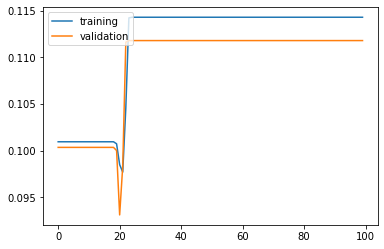

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [39]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 0s 796us/step - loss: 2.2992 - accuracy: 0.1135
Test accuracy:  0.11349999904632568


In [40]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [41]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


In [42]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [43]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

In [44]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 0s 927us/step - loss: 1.8364 - accuracy: 0.3687
Test accuracy:  0.3686999976634979


In [45]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [46]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
434/434 [==============================] - 1s 2ms/step - loss: 4.8086 - accuracy: 0.4045 - val_loss: 1.4932 - val_accuracy: 0.5598
Epoch 2/100
434/434 [==============================] - 1s 1ms/step - loss: 1.1830 - accuracy: 0.6254 - val_loss: 1.0865 - val_accuracy: 0.6433
Epoch 3/100
434/434 [==============================] - 1s 1ms/step - loss: 0.9445 - accuracy: 0.6800 - val_loss: 1.2321 - val_accuracy: 0.6525
Epoch 4/100
434/434 [==============================] - 1s 1ms/step - loss: 0.8192 - accuracy: 0.7162 - val_loss: 2.0639 - val_accuracy: 0.6515
Epoch 5/100
434/434 [==============================] - 1s 1ms/step - loss: 0.7261 - accuracy: 0.7508 - val_loss: 0.7878 - val_accuracy: 0.7520
Epoch 6/100
434/434 [==============================] - 1s 1ms/step - loss: 0.6476 - accuracy: 0.7833 - val_loss: 0.8583 - val_accuracy: 0.7118
Epoch 7/100
434/434 [==============================] - 1s 1ms/step - loss: 0.5915 - accuracy: 0.8110 - val_loss: 0.6613 - val_accuracy: 0.8108

Epoch 58/100
434/434 [==============================] - 1s 1ms/step - loss: 0.1602 - accuracy: 0.9536 - val_loss: 0.4906 - val_accuracy: 0.9089
Epoch 59/100
434/434 [==============================] - 1s 1ms/step - loss: 0.1586 - accuracy: 0.9538 - val_loss: 0.4889 - val_accuracy: 0.9061
Epoch 60/100
434/434 [==============================] - 1s 1ms/step - loss: 0.1588 - accuracy: 0.9527 - val_loss: 0.5098 - val_accuracy: 0.9029
Epoch 61/100
434/434 [==============================] - 1s 1ms/step - loss: 0.1574 - accuracy: 0.9544 - val_loss: 0.6206 - val_accuracy: 0.8855
Epoch 62/100
434/434 [==============================] - 1s 1ms/step - loss: 0.1618 - accuracy: 0.9519 - val_loss: 0.4770 - val_accuracy: 0.9089
Epoch 63/100
434/434 [==============================] - 1s 1ms/step - loss: 0.1535 - accuracy: 0.9549 - val_loss: 0.4802 - val_accuracy: 0.9091
Epoch 64/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1528 - accuracy: 0.9549 - val_loss: 0.4838 - val_accuracy:

In [47]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 0s 856us/step - loss: 0.5238 - accuracy: 0.9022
Test accuracy:  0.9021999835968018


In [48]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [49]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
434/434 [==============================] - 1s 2ms/step - loss: 6.1309 - accuracy: 0.5317 - val_loss: 1.2724 - val_accuracy: 0.6411
Epoch 2/100
434/434 [==============================] - 1s 2ms/step - loss: 1.0129 - accuracy: 0.7285 - val_loss: 0.8448 - val_accuracy: 0.7783
Epoch 3/100
434/434 [==============================] - 1s 2ms/step - loss: 0.6773 - accuracy: 0.8235 - val_loss: 0.6352 - val_accuracy: 0.8333
Epoch 4/100
434/434 [==============================] - 1s 2ms/step - loss: 0.5294 - accuracy: 0.8601 - val_loss: 0.5889 - val_accuracy: 0.8485
Epoch 5/100
434/434 [==============================] - 1s 2ms/step - loss: 0.4381 - accuracy: 0.8814 - val_loss: 0.5542 - val_accuracy: 0.8734
Epoch 6/100
434/434 [==============================] - 1s 2ms/step - loss: 0.3820 - accuracy: 0.8972 - val_loss: 0.4534 - val_accuracy: 0.8919
Epoch 7/100
434/434 [==============================] - 1s 2ms/step - loss: 0.3372 - accuracy: 0.9087 - val_loss: 0.4200 - val_accuracy: 0.8966

434/434 [==============================] - 1s 2ms/step - loss: 0.0430 - accuracy: 0.9886 - val_loss: 0.3766 - val_accuracy: 0.9453
Epoch 58/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0346 - accuracy: 0.9909 - val_loss: 0.3982 - val_accuracy: 0.9507
Epoch 59/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0347 - accuracy: 0.9905 - val_loss: 0.4712 - val_accuracy: 0.9396
Epoch 60/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0562 - accuracy: 0.9848 - val_loss: 0.4210 - val_accuracy: 0.9426
Epoch 61/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0521 - accuracy: 0.9868 - val_loss: 0.4173 - val_accuracy: 0.9379
Epoch 62/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0466 - accuracy: 0.9873 - val_loss: 0.4106 - val_accuracy: 0.9468
Epoch 63/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0498 - accuracy: 0.9865 - val_loss: 0.4259 - val_accuracy: 0.9451
Epoch

In [50]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 0s 917us/step - loss: 0.5300 - accuracy: 0.9451
Test accuracy:  0.9451000094413757


In [51]:
from keras.layers import BatchNormalization

In [52]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [53]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
434/434 [==============================] - 1s 3ms/step - loss: 0.7486 - accuracy: 0.7816 - val_loss: 0.3102 - val_accuracy: 0.9108
Epoch 2/100
434/434 [==============================] - 1s 2ms/step - loss: 0.3091 - accuracy: 0.9105 - val_loss: 0.2028 - val_accuracy: 0.9391
Epoch 3/100
434/434 [==============================] - 1s 2ms/step - loss: 0.2276 - accuracy: 0.9325 - val_loss: 0.1870 - val_accuracy: 0.9434
Epoch 4/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1882 - accuracy: 0.9447 - val_loss: 0.1574 - val_accuracy: 0.9527
Epoch 5/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1649 - accuracy: 0.9489 - val_loss: 0.1586 - val_accuracy: 0.9517
Epoch 6/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1431 - accuracy: 0.9571 - val_loss: 0.1557 - val_accuracy: 0.9540
Epoch 7/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1209 - accuracy: 0.9623 - val_loss: 0.1505 - val_accuracy: 0.9566

Epoch 58/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0224 - accuracy: 0.9931 - val_loss: 0.1573 - val_accuracy: 0.9636
Epoch 59/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0243 - accuracy: 0.9920 - val_loss: 0.1725 - val_accuracy: 0.9630
Epoch 60/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0273 - accuracy: 0.9910 - val_loss: 0.1659 - val_accuracy: 0.9626
Epoch 61/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0260 - accuracy: 0.9924 - val_loss: 0.1628 - val_accuracy: 0.9652
Epoch 62/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.1644 - val_accuracy: 0.9653
Epoch 63/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.1658 - val_accuracy: 0.9648
Epoch 64/100
434/434 [==============================] - 1s 2ms/step - loss: 0.0238 - accuracy: 0.9918 - val_loss: 0.1619 - val_accuracy:

In [54]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.1676 - accuracy: 0.9640
Test accuracy:  0.9639999866485596


In [55]:
from keras.layers import Dropout

In [56]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(BatchNormalization())
    model.add(Activation('relu'))  
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [57]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
434/434 [==============================] - 1s 3ms/step - loss: 1.3299 - accuracy: 0.5730 - val_loss: 0.4199 - val_accuracy: 0.8897
Epoch 2/100
434/434 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.7931 - val_loss: 0.2965 - val_accuracy: 0.9141
Epoch 3/100
434/434 [==============================] - 1s 2ms/step - loss: 0.5628 - accuracy: 0.8331 - val_loss: 0.2488 - val_accuracy: 0.9273
Epoch 4/100
434/434 [==============================] - 1s 3ms/step - loss: 0.4945 - accuracy: 0.8537 - val_loss: 0.2401 - val_accuracy: 0.9306
Epoch 5/100
434/434 [==============================] - 1s 3ms/step - loss: 0.4560 - accuracy: 0.8682 - val_loss: 0.2287 - val_accuracy: 0.9325
Epoch 6/100
434/434 [==============================] - 1s 2ms/step - loss: 0.4237 - accuracy: 0.8748 - val_loss: 0.2237 - val_accuracy: 0.9357
Epoch 7/100
434/434 [==============================] - 1s 2ms/step - loss: 0.4006 - accuracy: 0.8804 - val_loss: 0.2072 - val_accuracy: 0.9382

Epoch 58/100
434/434 [==============================] - 1s 3ms/step - loss: 0.1676 - accuracy: 0.9497 - val_loss: 0.1415 - val_accuracy: 0.9606
Epoch 59/100
434/434 [==============================] - 1s 3ms/step - loss: 0.1666 - accuracy: 0.9500 - val_loss: 0.1368 - val_accuracy: 0.9609
Epoch 60/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1605 - accuracy: 0.9531 - val_loss: 0.1366 - val_accuracy: 0.9608
Epoch 61/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1582 - accuracy: 0.9529 - val_loss: 0.1414 - val_accuracy: 0.9621
Epoch 62/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1569 - accuracy: 0.9532 - val_loss: 0.1410 - val_accuracy: 0.9611
Epoch 63/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1502 - accuracy: 0.9575 - val_loss: 0.1390 - val_accuracy: 0.9623
Epoch 64/100
434/434 [==============================] - 1s 2ms/step - loss: 0.1554 - accuracy: 0.9537 - val_loss: 0.1418 - val_accuracy:

In [58]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 0s 943us/step - loss: 0.1404 - accuracy: 0.9635
Test accuracy:  0.9635000228881836


In [59]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [60]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(BatchNormalization())
    model.add(Activation('relu'))  
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [61]:
model1=KerasClassifier(build_fn=mlp_model, epochs=100, verbose=1)
model2=KerasClassifier(build_fn=mlp_model, epochs=100, verbose=1)
model3=KerasClassifier(build_fn=mlp_model, epochs=100, verbose=1)

In [62]:
ens_clf=VotingClassifier(estimators=[('model1', model1), ('model2', model2), ('model3',model3)], voting='soft')

In [63]:
ens_clf.fit(X_train, y_train)

NotImplementedError: Multilabel and multi-output classification is not supported.

In [65]:
from keras.models import Sequential
from keras.layers import *

In [66]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
print(model.output_shape)

(None, 8, 8, 10)


In [67]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
data = datasets.load_digits()

In [69]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [90]:
from keras.datasets import cifar10

In [91]:
(xtrain, ytrain), _ =cifar10.load_data()

In [92]:
print(xtrain.shape)
xtrain[0]

(50000, 32, 32, 3)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

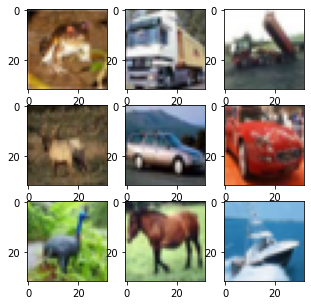

In [75]:
fig = plt.figure(figsize = (5, 5))
for i in range(9):
    fig.add_subplot(3, 3, i+1)
    plt.imshow(xtrain[i])

plt.show()

In [93]:
model=Sequential()

In [94]:
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))

In [96]:
model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))

model.add(Flatten())

In [97]:
model.output_shape

(None, 160)

In [98]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

def basic_cnn():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

model = basic_cnn()
model.summary()

IndexError: tuple index out of range

In [99]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

KeyError: 'acc'